**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_openml
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.Xtr = np.asarray(X)
        self.ytr = np.asarray(y)
        return self

    def predict(self, X):
        if self.algorithm == 'kd_tree':
            X = np.asarray(X)
            y = np.zeros(len(X))
            ind = KDTree(self.Xtr).query(X, k=self.n_neighbors,
                                         return_distance=False)

            def f(a):
                lab, count = np.unique(a, return_counts=True)
                return lab[np.argmax(count)]
            y = np.apply_along_axis(f, 1, self.ytr[ind])
            return y
        else:
            X = np.asarray(X)
            y = np.zeros(len(X))
            dist = (np.sum(X ** 2, axis=1).reshape(-1, 1) - 2 * X @ self.Xtr.T
                    + np.sum(self.Xtr ** 2, axis=1).reshape(1, -1))
            ind = np.argpartition(dist, self.n_neighbors - 1, axis=1)

            def f(a):
                lab, count = np.unique(a, return_counts=True)
                return lab[np.argmax(count)]
            y = np.apply_along_axis(f, 1, self.ytr[ind][:, 0:self.n_neighbors])
            return y

    def predict_proba(self, X):
        if self.algorithm == 'kd_tree':
            X = np.asarray(X)
            y = np.zeros(len(X))
            uni = np.unique(self.ytr)
            ind = KDTree(self.Xtr).query(X, k=self.n_neighbors,
                                         return_distance=False)

            def f(a):
                proba = []
                for i, el in enumerate(uni):
                    proba.append(np.sum(np.fromiter((e == el for e in a),
                                                    int)) / self.n_neighbors)
                return proba
            y = np.apply_along_axis(f, 1, self.ytr[ind])
            return y
        else:
            X = np.asarray(X)
            y = np.zeros(len(X))
            uni = np.unique(self.ytr)
            dist = (np.sum(X ** 2, axis=1).reshape(-1, 1) - 2 * X @ self.Xtr.T
                    + np.sum(self.Xtr ** 2, axis=1).reshape(1, -1))
            ind = np.argpartition(dist, self.n_neighbors - 1, axis=1)

            def f(a):
                proba = []
                for i, el in enumerate(uni):
                    proba.append(np.sum(np.fromiter((e == el for e in a),
                                                    int)) / self.n_neighbors)
                return proba
            y = np.apply_along_axis(f, 1, self.ytr[ind][:, 0:self.n_neighbors])
            return y

    def score(self, X, y):
        y = np.asarray(y)
        return np.sum(y == self.predict(X)) / len(y)

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

Wall time: 997 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [8]:
%time clf.predict(X_test)

Wall time: 4.99 ms


array([1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 0, 0])

In [9]:
%time my_clf.predict(X_test)

Wall time: 0 ns


array([1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 0, 0])

In [10]:
%time clf.predict_proba(X_test)

Wall time: 997 µs


array([[0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ]])

In [11]:
%time my_clf.predict_proba(X_test)

Wall time: 999 µs


array([[0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ]])

In [12]:
clf.score(X_test, y_test)

0.8

In [13]:
my_clf.score(X_test, y_test)

0.8

Задание 3

Text(0, 0.5, 'n_neighbors')

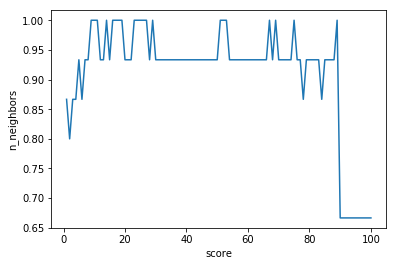

In [14]:
#%%pycodestyle


nb = range(1, 101)
score = [0]*100
for el in nb:
    KNN = MyKNeighborsClassifier(n_neighbors=el)
    KNN.fit(X_train, y_train)
    score[el-1] = KNN.score(X_test, y_test)
fig = plt.figure()
ax = plt.subplot()
plt.plot(nb, score)
ax.set_xlabel('score')
ax.set_ylabel('n_neighbors')

**MNIST**

In [15]:
mnist = fetch_openml('mnist_784')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

Wall time: 183 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [20]:
%time clf.predict(X_test)

Wall time: 1.27 s


array(['4', '0', '7', '2', '5', '2', '7', '4', '3', '1', '3', '3', '7',
       '3', '8', '9', '1', '5', '4', '1', '0', '9', '0', '4', '3', '9',
       '0', '0', '8', '2', '9', '7', '6', '2', '1', '4', '6', '4', '3',
       '4', '8', '5', '5', '6', '5', '2', '1', '0', '8', '6', '6', '2',
       '6', '5', '3', '5', '1', '7', '2', '0', '4', '7', '3', '9', '2',
       '3', '9', '4', '7', '1', '3', '2', '2', '6', '9', '0', '9', '9',
       '9', '8', '3', '8', '3', '6', '1', '2', '3', '7', '0', '7', '7',
       '7', '1', '6', '4', '9', '1', '5', '1', '4', '6', '4', '7', '2',
       '2', '4', '1', '1', '2', '2', '9', '7', '9', '1', '9', '8', '1',
       '7', '7', '3', '1', '5', '9', '5', '3', '9', '4', '3', '2', '5',
       '8', '5', '0', '3', '4', '5', '3', '4', '6', '9', '3', '8', '9',
       '4', '3', '8', '6', '1', '2', '4', '0', '2', '1', '2', '7', '4',
       '3', '8', '6', '1', '4', '6', '3', '3', '1', '0', '3', '2', '0',
       '0', '1', '9', '5', '4', '7', '6', '5', '1', '5', '0', '2

In [21]:
%time my_clf.predict(X_test)

Wall time: 1.61 s


array(['4', '0', '7', '2', '5', '2', '7', '4', '3', '1', '3', '3', '7',
       '3', '8', '9', '1', '5', '4', '1', '0', '9', '0', '4', '3', '9',
       '0', '0', '8', '2', '9', '7', '6', '2', '1', '4', '6', '4', '3',
       '4', '8', '5', '5', '6', '5', '2', '1', '0', '8', '6', '6', '2',
       '6', '5', '3', '5', '1', '7', '2', '0', '4', '7', '3', '9', '2',
       '3', '9', '4', '7', '1', '3', '2', '2', '6', '9', '0', '9', '9',
       '9', '8', '3', '8', '3', '6', '1', '2', '3', '7', '0', '7', '7',
       '7', '1', '6', '4', '9', '1', '5', '1', '4', '6', '4', '7', '2',
       '2', '4', '1', '1', '2', '2', '9', '7', '9', '1', '9', '8', '1',
       '7', '7', '3', '1', '5', '9', '5', '3', '9', '4', '3', '2', '5',
       '8', '5', '0', '3', '4', '5', '3', '4', '6', '9', '3', '8', '9',
       '4', '3', '8', '6', '1', '2', '4', '0', '2', '1', '2', '7', '4',
       '3', '8', '6', '1', '4', '6', '3', '3', '1', '0', '3', '2', '0',
       '0', '1', '9', '5', '4', '7', '6', '5', '1', '5', '0', '2

In [22]:
%time clf.predict_proba(X_test)

Wall time: 1.18 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [23]:
%time my_clf.predict_proba(X_test)

Wall time: 1.63 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [24]:
clf.score(X_test, y_test)

0.9671428571428572

In [25]:
my_clf.score(X_test, y_test)

0.9671428571428572

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [28]:
%time clf.fit(X_train, y_train)

Wall time: 19.8 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


MyKNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [30]:
%time clf.predict(X_test)

Wall time: 58.5 s


array(['7', '2', '1', '2', '2', '5', '2', '7', '3', '1', '3', '4', '8',
       '4', '5', '2', '0', '9', '4', '7', '3', '2', '6', '3', '1', '3',
       '2', '5', '4', '9', '2', '0', '6', '6', '9', '4', '1', '3', '8',
       '9', '8', '0', '3', '2', '2', '9', '9', '5', '4', '0', '8', '4',
       '3', '6', '4', '7', '0', '2', '4', '2', '9', '6', '0', '4', '8',
       '3', '0', '3', '9', '4', '8', '0', '2', '5', '2', '9', '9', '8',
       '6', '1', '2', '1', '6', '1', '4', '3', '8', '6', '4', '1', '1',
       '7', '4', '8', '3', '1', '1', '9', '6', '8', '7', '6', '0', '0',
       '7', '7', '8', '6', '3', '9', '0', '2', '6', '3', '6', '7', '1',
       '9', '7', '6', '7', '5', '2', '1', '5', '6', '4', '8', '5', '3',
       '2', '6', '2', '9', '3', '3', '5', '4', '2', '7', '6', '7', '2',
       '8', '8', '5', '6', '0', '0', '2', '4', '5', '6', '3', '4', '7',
       '5', '0', '5', '4', '1', '6', '0', '3', '2', '0', '3', '0', '8',
       '3', '7', '5', '5', '9', '3', '6', '6', '1', '9', '9', '0

In [31]:
%time my_clf.predict(X_test)

Wall time: 1min 7s


array(['7', '2', '1', '2', '2', '5', '2', '7', '3', '1', '3', '4', '8',
       '4', '5', '2', '0', '9', '4', '7', '3', '2', '6', '3', '1', '3',
       '2', '5', '4', '9', '2', '0', '6', '6', '9', '4', '1', '3', '8',
       '9', '8', '0', '3', '2', '2', '9', '9', '5', '4', '0', '8', '4',
       '3', '6', '4', '7', '0', '2', '4', '2', '9', '6', '0', '4', '8',
       '3', '0', '3', '9', '4', '8', '0', '2', '5', '2', '9', '9', '8',
       '6', '1', '2', '1', '6', '1', '4', '3', '8', '6', '4', '1', '1',
       '7', '4', '8', '3', '1', '1', '9', '6', '8', '7', '6', '0', '0',
       '7', '7', '8', '6', '3', '9', '0', '2', '6', '3', '6', '7', '1',
       '9', '7', '6', '7', '5', '2', '1', '5', '6', '4', '8', '5', '3',
       '2', '6', '2', '9', '3', '3', '5', '4', '2', '7', '6', '7', '2',
       '8', '8', '5', '6', '0', '0', '2', '4', '5', '6', '3', '4', '7',
       '5', '0', '5', '4', '1', '6', '0', '3', '2', '0', '3', '0', '8',
       '3', '7', '5', '5', '9', '3', '6', '6', '1', '9', '9', '0

In [32]:
%time clf.predict_proba(X_test)

Wall time: 58.3 s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [33]:
%time my_clf.predict_proba(X_test)

Wall time: 1min 7s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [34]:
clf.score(X_test, y_test)

0.9785714285714285

In [35]:
my_clf.score(X_test, y_test)

0.9785714285714285

Задание 5

In [ ]:
# seaborn
    #Seaborn - это библиотека визуализации данных Python, основанная на matplotlib.
    #Она предоставляет высокоуровневый интерфейс для рисования привлекательной
    #и информативной статистической графики.
# matplotlib
    #Библиотека для визуализации данных двумерной и трехмерной графикой.
# train_test_split
    #Разбивает dataset на случайные подмноженства train и test в необходимом соотношении.
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
    #Последовательное сцепление нескольких преобразований.
# StandardScaler (from sklearn.preprocessing import StandardScaler)
    #Стандартизация признаков(вычесть среднее и поделить на стандартное отклонение)
# ClassifierMixin
    #Наследуемый класс, в нем содержится метод score.
# NeighborsBase
    #Наследуемый класс, в нем содержатся конструктор классификаторов, 
    #методы обучения, определения алгоритма поиска соседей.
# KNeighborsMixin
    #Наследуемый класс, в нем содержатся методы для вычисления расстояний, 
    #поиска индексов соседей, построения графов соседей.
# SupervisedIntegerMixin
    #Наследуемый класс, в нем содержится метод обучения в случае целых целевых переменных.